## Machine Learning - CS 677

##Final Project - Clustering

##Group 9
  - Inamdar Ali
  - Joshi Shivam
  - Bhatt Hardik
  - Kumar Robin


In [77]:
# Importing all libarires required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.metrics import adjusted_rand_score

In [4]:
# Importing the Dataset
data = pd.read_csv('/content/wine-clustering.csv')

In [5]:
#Printing the Dataset
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Printing all the information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
# Finding out the values and average values of the Dataset.
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
# Finding out if our Dataset has NULL values
data.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [8]:
# Dropping all NULL values from the Dataset.
data = data.dropna()

In [21]:
# Printing out the list of all columns present in the Dataset.
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

## EDA

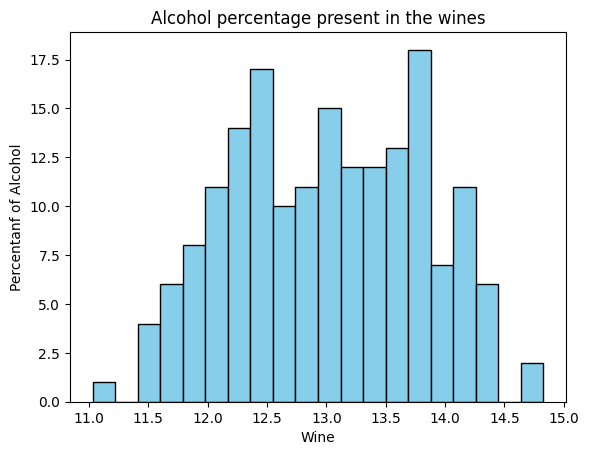

In [11]:
# Plotting a bar graph to show the Alcohol percentage present in the wines.
plt.hist(data['Alcohol'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Wine')
plt.ylabel('Percentanf of Alcohol')
plt.title('Alcohol percentage present in the wines')
plt.show()


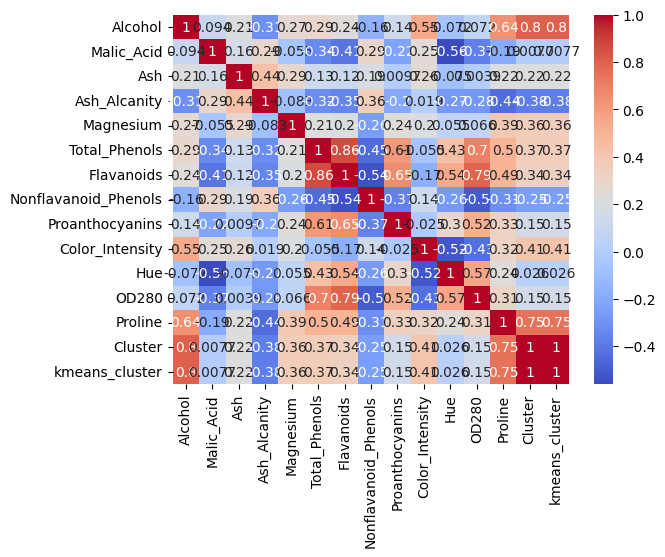

In [90]:
# Printing a Correlation Heatmap for the Dataset.
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',)
plt.show()

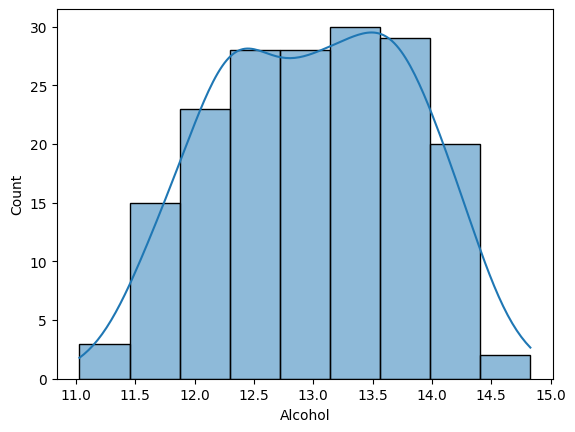

In [12]:
# Plotting a graph to show the number of wines containing the similar perecentange of Alcohol
sns.histplot(data['Alcohol'], kde=True)
plt.show()

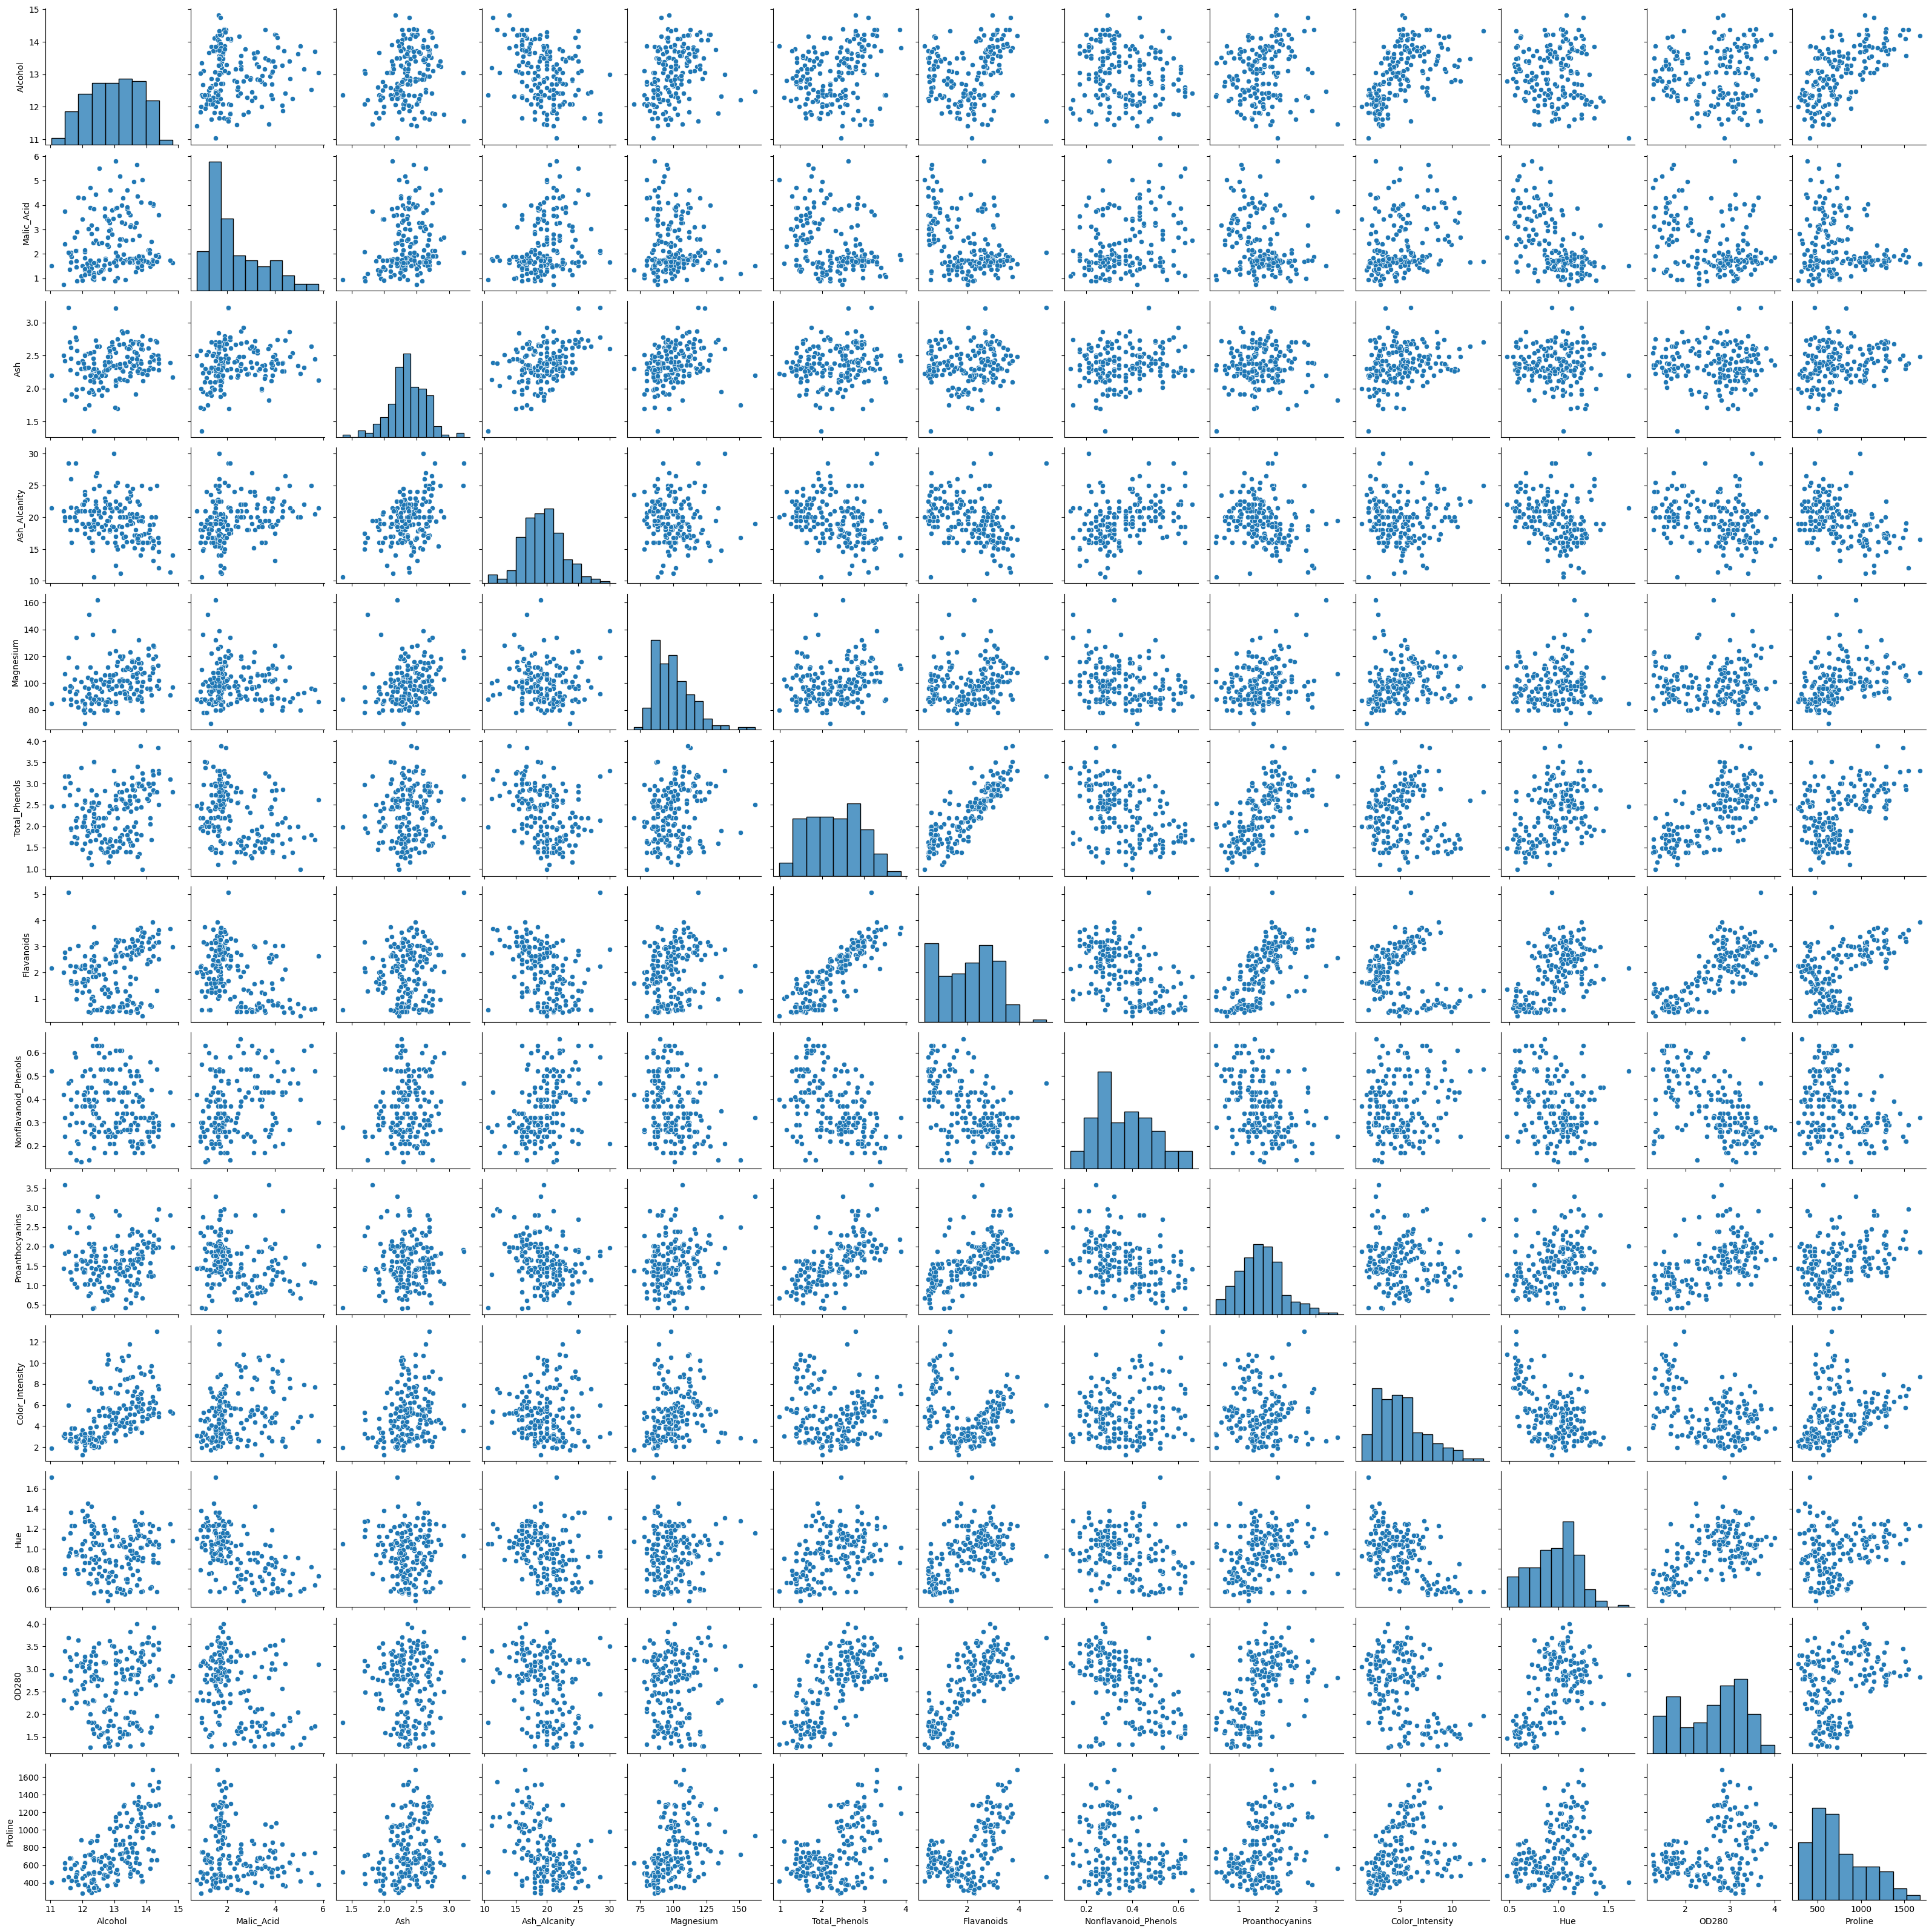

In [13]:
# Plotting a pair plot to show all correlations between all features
sns.pairplot(data)
plt.show()

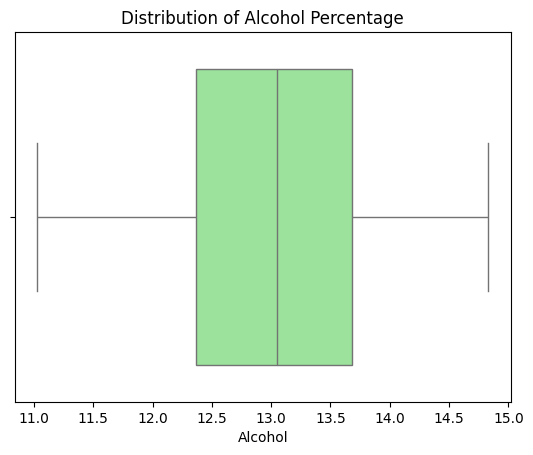

In [15]:
# Plotting a boxplot for Alcohol percentage
sns.boxplot(x='Alcohol', data=data, color='lightgreen')
plt.xlabel('Alcohol')
plt.title('Distribution of Alcohol Percentage')
plt.show()

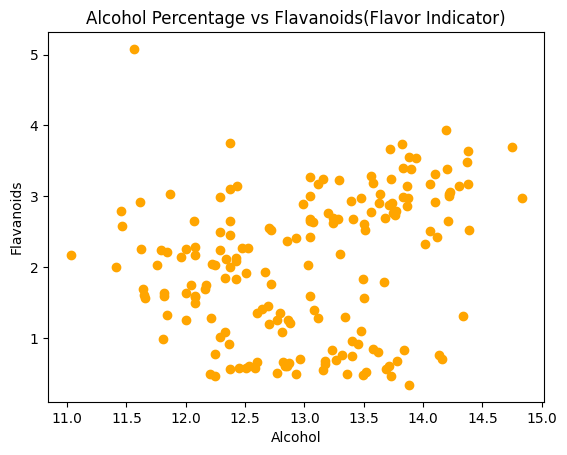

In [27]:
# Plotting the scatter plot for Alcohol Percentage vs Flavanoids
plt.scatter(x='Alcohol', y='Flavanoids', data=data, color='orange')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Alcohol Percentage vs Flavanoids(Flavor Indicator)')
plt.show()


## K-Means Clustering Algorithm:

In [17]:
# Pre-Processing the Dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [24]:
X = data[['Alcohol' , 'Flavanoids']].iloc[: , :].values

In [47]:
# Initializing and Fitting the K-Means Model.
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(X)

KMeans(n_clusters=3)

In [48]:
# Printing the K-Means labels.
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

For Optimal value of K.

In [49]:
# Finding the Optimal number of K , using Elbow Method
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

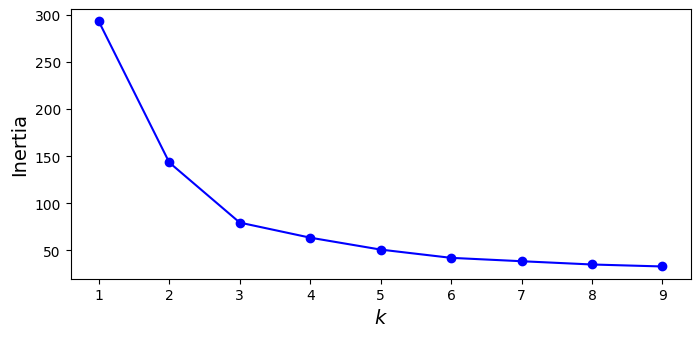

In [50]:
# Plotting the Eblow Method graph.
def plot_elbow_figure():
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, 10), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)


plot_elbow_figure()

In [51]:
# Printing the Silhouette Score
silhouette_score(X, kmeans.labels_)

0.5000336272075001

Text(0, 0.5, 'Silhouette score')

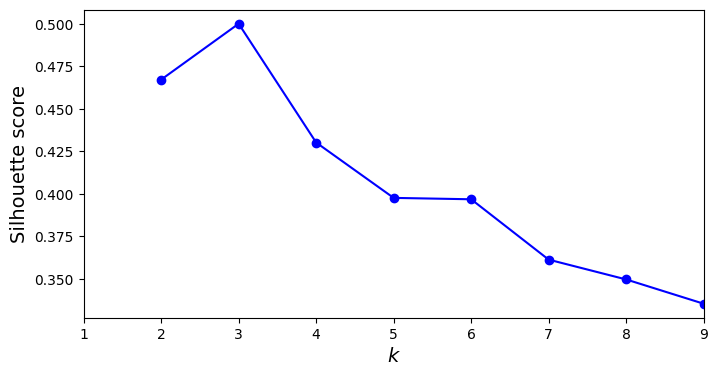

In [52]:
# Plotting the Sihouette Score graph.
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.xlim(1, 9)
plt.ylabel("Silhouette score", fontsize=14)

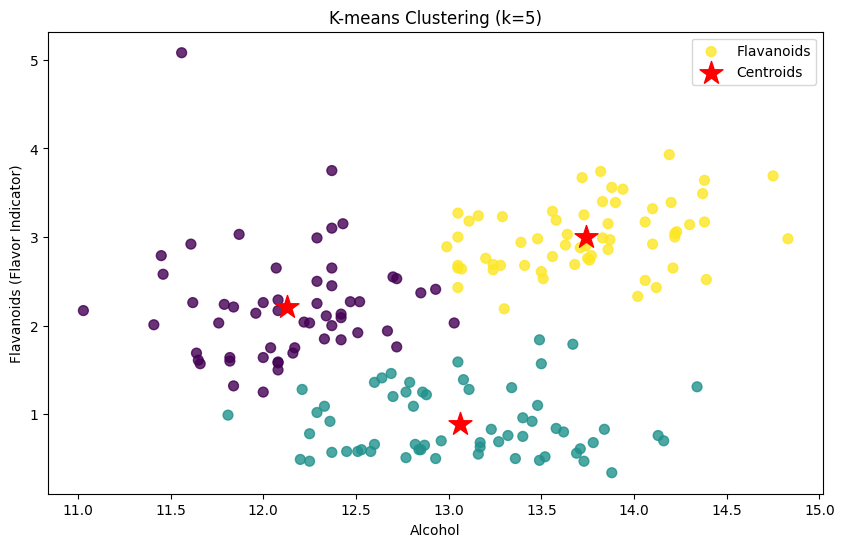

In [55]:
# Plotting the K-Means Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data[['Alcohol', 'Flavanoids']])
data['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(x='Alcohol', y='Flavanoids', data=data, c='Cluster', cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids (Flavor Indicator)')
plt.title('K-means Clustering (k=5)')
plt.legend()
plt.show()

In [57]:
# Printing the Silhouette Score(Accuracy of the K-Means Algorithm)
silhouette_avg = silhouette_score(data[['Alcohol', 'Flavanoids']], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5000336272075001


##DBSCAN Clustering Algorithm

In [60]:
# Preprocess data
X = data[['Alcohol', 'Flavanoids']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

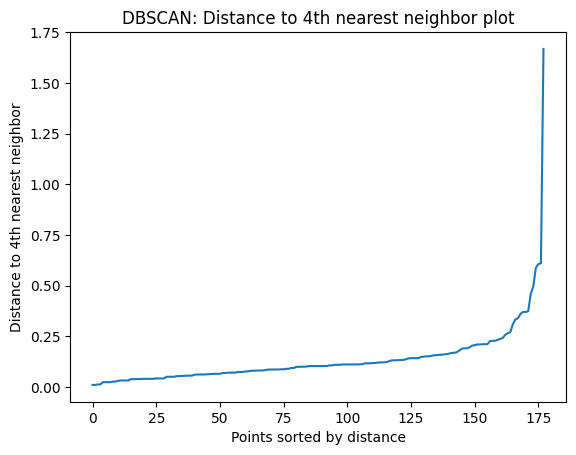

In [61]:
# Determine optimal parameters for DBSCAN
def plot_dbscan_distance(X, k):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    plt.plot(distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Distance to {}th nearest neighbor'.format(k))
    plt.title('DBSCAN: Distance to {}th nearest neighbor plot'.format(k))
    plt.show()

plot_dbscan_distance(X_scaled, k=4)  # Adjust k as needed

In [62]:
# Implement DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust parameters as needed
dbscan_clusters = dbscan.fit_predict(X_scaled)

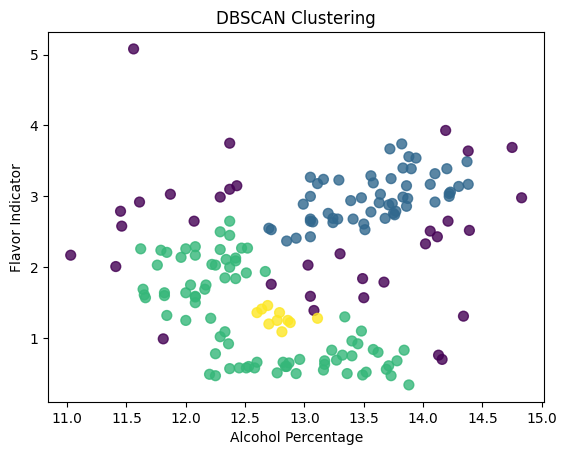

In [63]:
# Visualize DBSCAN clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Alcohol Percentage')
plt.ylabel('Flavor Indicator')
plt.title('DBSCAN Clustering')
plt.show()

Here , We can see that DBSCAN has picked up noise while forming the clusters(indicated in purple).

##Gaussian Mixture Model(GMM)

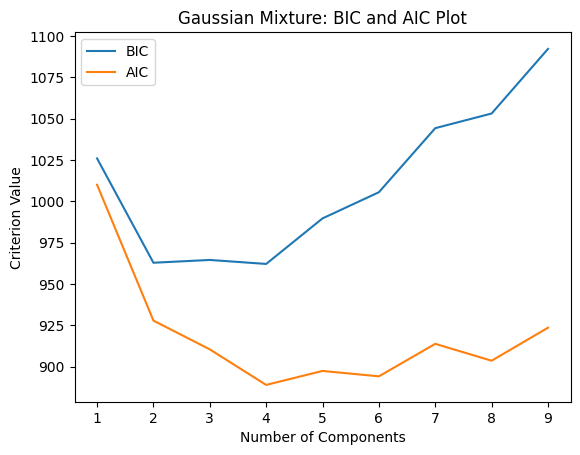

In [64]:
# Determining the optimal parameters for Gaussian Mixtures
def plot_gaussian_mixture_criteria(X):
    n_components = range(1, 10)  # Adjust as needed
    models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X) for n in n_components]

    plt.plot(n_components, [model.bic(X) for model in models], label='BIC')
    plt.plot(n_components, [model.aic(X) for model in models], label='AIC')
    plt.xlabel('Number of Components')
    plt.ylabel('Criterion Value')
    plt.title('Gaussian Mixture: BIC and AIC Plot')
    plt.legend()
    plt.show()

plot_gaussian_mixture_criteria(X_scaled)

In [65]:
# Implementing the  Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  # Adjust parameters as needed
gmm_clusters = gmm.fit_predict(X_scaled)

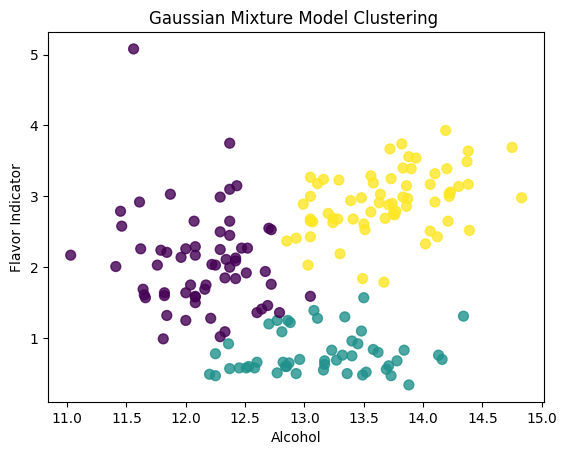

In [67]:
# Visualize Gaussian Mixture clusters
plt.scatter(X[:, 0], X[:, 1], c=gmm_clusters, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Alcohol')
plt.ylabel('Flavor Indicator')
plt.title(f'Gaussian Mixture Model Clustering ')
plt.show()

##Isolation Forest for Anomaly Detection

In [68]:
# Implementing Isolation Forest
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(X_scaled)
outliers = isolation_forest.predict(X_scaled)

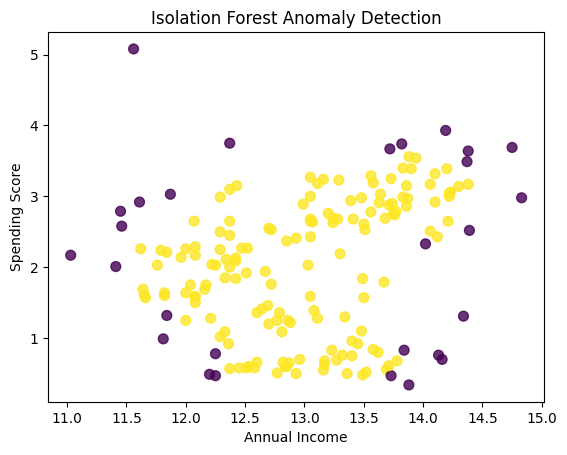

In [70]:
# Visualizing the Isolation Forest for anomalies
plt.scatter(X[:, 0], X[:, 1], c=outliers, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

##Evaluation of Clustering techniques used:

In [78]:
# Evaluating the clustering techniques
def evaluate_clustering(X, true_labels, predicted_labels):
    silhouette_avg = silhouette_score(X, predicted_labels)
    adj_rand_index = adjusted_rand_score(true_labels, predicted_labels)
    db_index = davies_bouldin_score(X, predicted_labels)

    print("Silhouette Score:", silhouette_avg)
    print("Adjusted Rand Index:", adj_rand_index)
    print("Davies-Bouldin Index:", db_index)

In [79]:
# Assuming true labels are available (for comparison)
true_labels = data['Cluster']  # Assuming 'Cluster' column contains true cluster labels

In [80]:
# Evaluate DBSCAN
evaluate_clustering(X_scaled, true_labels, dbscan_clusters)

Silhouette Score: 0.048883960049921786
Adjusted Rand Index: 0.38420675256911047
Davies-Bouldin Index: 3.8193069057195457


In [81]:
# Evaluate Gaussian Mixture
evaluate_clustering(X_scaled, true_labels, gmm_clusters)

Silhouette Score: 0.4850160305456621
Adjusted Rand Index: 0.7831914379995453
Davies-Bouldin Index: 0.7143913515898731


In [82]:
# Evaluate Isolation Forest
evaluate_clustering(X_scaled, true_labels, outliers)

Silhouette Score: 0.21480806535554398
Adjusted Rand Index: -0.0031991500430418843
Davies-Bouldin Index: 11.94326060193433


In [84]:
data['kmeans_cluster'] = kmeans.labels_

In [85]:
# Internal Metrics: Silhouette Score, Davies-Bouldin Index
print("K-means Silhouette Score:", silhouette_score(X_scaled, data['kmeans_cluster']))
print("K-means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, data['kmeans_cluster']))

K-means Silhouette Score: 0.4940398436247922
K-means Davies-Bouldin Index: 0.7261431599370688


In [97]:
# Calculating the Recall, Prescion and F1 score for K-Means:
recall = recall_score(true_labels, data['kmeans_cluster'], average='weighted')
precision = precision_score(true_labels, data['kmeans_cluster'], average='weighted')
f1 = f1_score(true_labels, data['kmeans_cluster'], average='weighted')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 1.0
Precision: 1.0
F1 Score: 1.0


In [98]:
# Calculating the Recall, Prescion and F1 score for DBSCAN
recall = recall_score(true_labels, dbscan_clusters, average='weighted')
precision = precision_score(true_labels, dbscan_clusters, average='weighted')
f1 = f1_score(true_labels, dbscan_clusters, average='weighted')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.25842696629213485
Precision: 0.20279622063329927
F1 Score: 0.2268340537525333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
# Calculating the Recall, Prescion and F1 score for GMM
recall = recall_score(true_labels, gmm_clusters, average='weighted')
precision = precision_score(true_labels, gmm_clusters, average='weighted')
f1 = f1_score(true_labels, gmm_clusters, average='weighted')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.9213483146067416
Precision: 0.9283694135995695
F1 Score: 0.9205531735818431


In [100]:
# Calculating the Recall, Prescion and F1 score for Isolation Forest
recall = recall_score(true_labels, outliers, average='weighted')
precision = precision_score(true_labels, outliers, average='weighted')
f1 = f1_score(true_labels, outliers, average='weighted')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.28651685393258425
Precision: 0.11651685393258428
F1 Score: 0.1656637733638639


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
